<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head() 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape #determining the number of rows and columns

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes 

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
#calculating the average duration of the movies and rounding the number to 2 decimal places 
round(movies.duration.mean(),2) 

120.98

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
#movie with the longest duration 
movies.sort_values('duration', ascending=False)

#Per below "Hamlet" is the longest movie and "Freaks" is the shortest movie

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

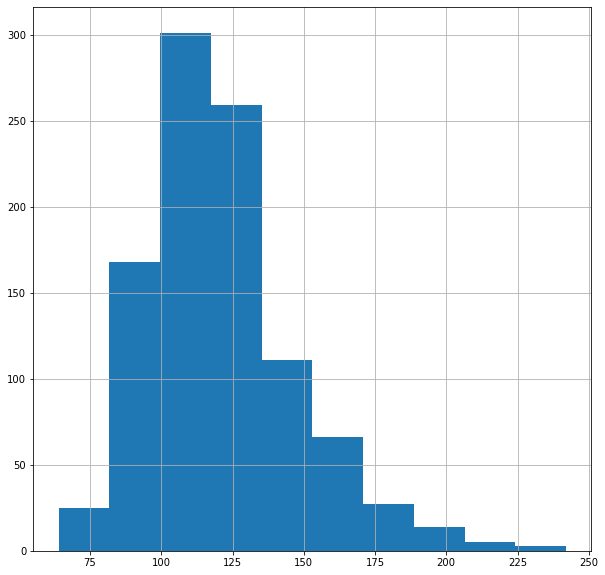

In [7]:
#making a histogram for the duration
#adding 10 bins
#setting the figure size to 10x10
movies.duration.hist(bins=10,figsize=(10,10));

#### Use a box plot to display that same data.

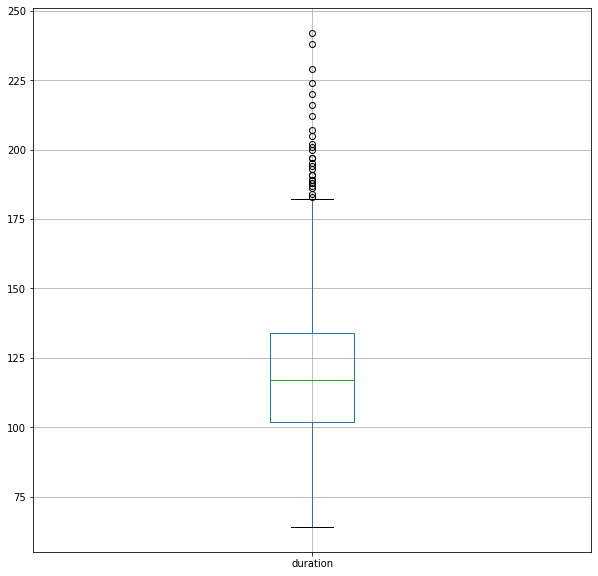

In [8]:
movies.boxplot('duration',figsize=(10,10));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

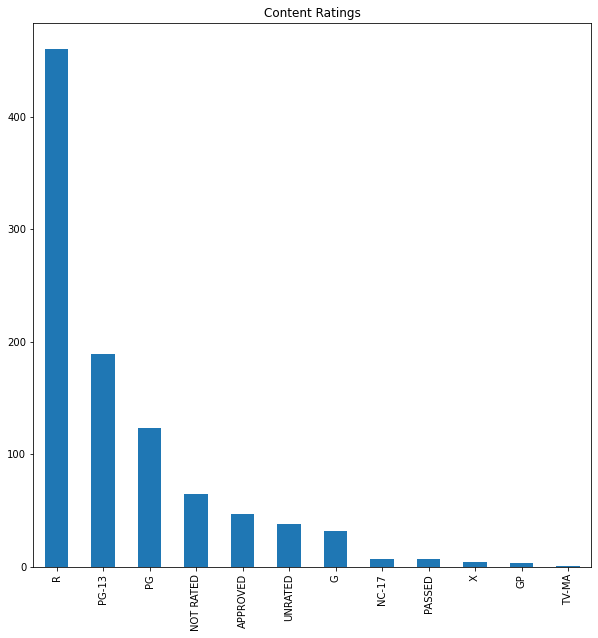

In [12]:
movies.content_rating.value_counts().plot(kind='bar',figsize=(10,10), title='Content Ratings');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
#creating a filter for all movies that have not rated, approved, passed as the content ratings
row_mask = movies.content_rating.isin(['NOT RATED','APPROVED','PASSED','GP'])
#using the filter to select and replace relevant rows
movies.loc[row_mask, 'content_rating'] = "UNRATED"

In [14]:
#checking if it worked 
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
#doing the same thing here 
second_mask = movies.content_rating.isin(['X','TV-MA'])

movies.loc[second_mask, 'content_rating'] = "NC-17"

In [15]:
#checking if it worked
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [16]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
#finding everything with a null value
third_mask = movies.content_rating.isnull()

#replacing those rows with unrated 
movies.loc[third_mask, 'content_rating'] = "UNRATED"

In [18]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [20]:
#counting the number of null values
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
#average star rating for movies 2 hours or longer
round(movies[movies.duration >= 120].star_rating.mean(),2)

7.95

In [22]:
#average star rating for movies shorter than 2 hours 
round(movies[movies.duration < 120].star_rating.mean(),2)

7.84

#### Use a visualization to detect whether there is a relationship between duration and star rating.

star_rating    0.227149
duration       1.000000
Name: duration, dtype: float64


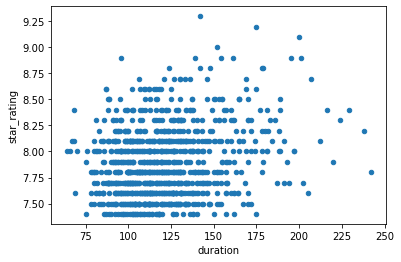

In [21]:
#plotting a scatter graph 
movies.plot(kind='scatter', x='duration', y='star_rating');

print((movies.corr()['duration']))  

#### Calculate the average duration for each genre.

In [22]:
round(movies.groupby('genre').duration.mean(),2)

genre
Action       126.49
Adventure    134.84
Animation     96.60
Biography    131.84
Comedy       107.60
Crime        122.30
Drama        126.54
Family       107.50
Fantasy      112.00
Film-Noir     97.33
History       66.00
Horror       102.52
Mystery      115.62
Sci-Fi       109.00
Thriller     114.20
Western      136.67
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

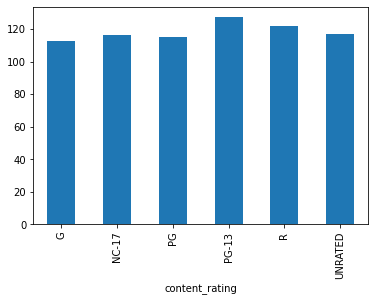

In [23]:
#grouping the movies dataframe by content_rating and averaging out the durations
#assigning the output I get to a new dataframe
grouping = movies.groupby('content_rating').duration.mean()

#plotting the new dataframe
grouping.plot.bar();

#### Determine the top rated movie (by star rating) for each genre.

In [32]:
#sorting star rating in a descending manner
#then grouping them by genre 
#and finding the max value per genre 
new_df = movies.sort_values('star_rating', ascending=False).groupby('genre').max()
new_df

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [36]:
#checking if there are duplicate titles 
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [37]:
#double checking if the movies are actually duplicates 
movies.loc[movies.title == 'The Girl with the Dragon Tattoo']

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [45]:
#checking if all fields in a row is identical to another 
movies.duplicated().sum() 

0

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [76]:
movies.genre.value_counts()
over_ten = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(over_ten)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [94]:
all_genres = movies.genre.value_counts()
top_genres = all_genres[all_genres >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [64]:
mean_rating = movies.groupby('genre').star_rating.agg(['mean'])
count_bool = movies.genre.value_counts() > 10
mean_rating[count_bool]

<ipython-input-64-dafa4c54212d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_rating[count_bool]


,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [60]:
count_mean_df = movies.groupby('genre').star_rating.agg(['count','mean'])
greater_10 = count_mean_df['count'] >= 10
count_mean_df[greater_10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [104]:
#finding the average rating of the movies Morgan Freeman has acted in
morganf_movies = movies[movies.actors_list.str.contains('Morgan Freeman')]
morganf_movies.star_rating.mean()

8.0875

In [105]:
#finding the most common genre of movies featuring Morgan Freeman
morganf_movies.genre.value_counts()

Crime        3
Drama        2
Western      1
Adventure    1
Comedy       1
Name: genre, dtype: int64